In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, LongType, DoubleType

spark=SparkSession \
    .builder \
    .appName("sampling") \
    .master("local") \
    .config("spark.mongodb.input.uri", "mongodb://localhost:27017/") \
    .config("spark.mongodb.output.uri", "mongodb://localhost:27017/") \
    .config("spark.executor.memory", "9g") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1") \
    .getOrCreate()

df = spark.read.format("com.mongodb.spark.sql.DefaultSource").option("pipeline", "[{'$sample': {'size': 100000} }]")\
    .option("uri", "mongodb://localhost:27017/"+"amazon"+"."+"data")\
    .option("partitioner", "MongoSinglePartitioner") \
    .option("partitionkey", "asin")\
    .load()

sampledf = df.toPandas()

In [11]:
sampledf.head()

,_id,asin,overall,reviewText,reviewerID,reviewerName,summary,unixReviewTime,verified
0,"(64566a30b3ab715eba9a1c06,)",1490407081,5.0,sweet book. loved the characters. Looked kin...,AA8QD1DI7OMSD,nanna27,Sweet romance,1.397261e+09,True
1,"(645665b0b3ab715eba8fabdb,)",B000ENUL8O,5.0,I was delighted to hear that Instant Star woul...,ACFGZ1D9CY7HK,Veronica O,This Star continues to SHINE,1.186099e+09,False
2,"(64565f44b3ab715eba2124c4,)",B01BNN6J6Q,5.0,Good quality..Easy to assembly..'',A1TBH91VETNPDP,Joe L.,Great product....,1.476317e+09,True
3,"(64566adbb3ab715eba22d5c4,)",817898346X,5.0,nice book,AZS3AA42LZ0OC,Fatima,Five Stars,1.467072e+09,True
4,"(64566501b3ab715ebae4b71d,)",B000C5DZWI,1.0,This part fell apart after one week. No way to...,A1A86KFT83LQ7V,Amazon Customer,This part fell apart after one week.,1.502755e+09,True


In [12]:
sampledf.to_csv("sample.csv", index=False)

In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, LongType, DoubleType

spark=SparkSession \
    .builder \
    .appName("sampling") \
    .master("local") \
    .config("spark.mongodb.input.uri", "mongodb://localhost:27017/") \
    .config("spark.mongodb.output.uri", "mongodb://localhost:27017/") \
    .config("spark.executor.memory", "9g") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1") \
    .getOrCreate()

df = spark.read.format("com.mongodb.spark.sql.DefaultSource")\
    .option("uri", "mongodb://localhost:27017/"+"amazon"+"."+"data")\
    .option("partitioner", "MongoSinglePartitioner") \
    .option("partitionkey", "asin")\
    .load()



In [14]:
from pyspark.sql.functions import mean, stddev, col
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Mean: 4.232190208636595
Standard deviation: 1.2465116112162211


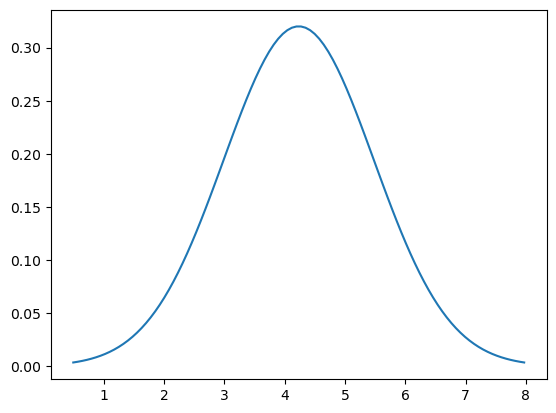

In [15]:
# Calculate the mean and standard deviation of the 'overall' column
overall_mean = df.select(mean(col('overall'))).collect()[0][0]
overall_std = df.select(stddev(col('overall'))).collect()[0][0]

# Create a normal distribution with the same mean and standard deviation as the 'overall' column
norm_dist = stats.norm(overall_mean, overall_std)

# Create an array of x-values (the range of the normal distribution)
x = np.linspace(overall_mean - 3*overall_std, overall_mean + 3*overall_std, 100)

# Create an array of y-values (the probability density at each x-value)
y = norm_dist.pdf(x)

# Plot the normal distribution curve
plt.plot(x, y)

# Display the mean and standard deviation
print("Mean:", overall_mean)
print("Standard deviation:", overall_std)

# Show the plot
plt.show()

In [9]:
spark.stop()